# Star Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. Star Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. As a data scientist, the objective is to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by Star Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To perform statistical analysis
import scipy.stats as stats

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

## Data Overview

- Observations
- Sanity checks

In [2]:
StarHotelsGroup = pd.read_csv("StarHotelsGroup.csv")

In [3]:
# copying data to another variable to avoid any changes to original data
data = StarHotelsGroup.copy()

In [4]:
# view the first 5 rows of dataset
data.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             3               0                     0                  3   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1        277   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2019              7            13              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               89.10   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       2       Canceled

In [5]:
# view the last 5 rows of dataset
data.tail()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
56921             2               1                     0                  1   
56922             2               0                     1                  1   
56923             2               0                     0                  3   
56924             2               0                     2                  2   
56925             2               0                     1                  2   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
56921       Meal Plan 2                           0        Room_Type 4   
56922       Meal Plan 1                           0        Room_Type 1   
56923      Not Selected                           0        Room_Type 1   
56924      Not Selected                           0        Room_Type 1   
56925       Meal Plan 1                           0        Room_Type 1   

       lead_time  arrival_year  arrival_month  arrival_date  \
56921         45          2019              6            15   
56922        320          2019              5            15   
56923         63          2018              4            21   
56924          6          2019              4            28   
56925        207          2018             12            30   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
56921              Online               0                             0   
56922             Offline               0                             0   
56923              Online               0                             0   
56924              Online               0                             0   
56925             Offline               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
56921                                     0              163.88   
56922                                     0               90.00   
56923                                     0               94.50   
56924                                     0              162.50   
56925                                     0              161.67   

       no_of_special_requests booking_status  
56921                       1   Not_Canceled  
56922                       1       Canceled  
56923                       0       Canceled  
56924                       2   Not_Canceled  
56925                       0   Not_Canceled

In [6]:
# understand the shape of dataset
data.shape

(56926, 18)

- The dataset has 56926 rows and 18 columns

In [7]:
# checking for duplicate data, if any
data[data.duplicated()].count()

no_of_adults                            14350
no_of_children                          14350
no_of_weekend_nights                    14350
no_of_week_nights                       14350
type_of_meal_plan                       14350
required_car_parking_space              14350
room_type_reserved                      14350
lead_time                               14350
arrival_year                            14350
arrival_month                           14350
arrival_date                            14350
market_segment_type                     14350
repeated_guest                          14350
no_of_previous_cancellations            14350
no_of_previous_bookings_not_canceled    14350
avg_price_per_room                      14350
no_of_special_requests                  14350
booking_status                          14350
dtype: int64

- There are 14350 duplicate entries in our dataset

In [8]:
# removing the duplicate entries
data.drop_duplicates(inplace=True)

In [9]:
# rechecking the shape of the dataset
data.shape

(42576, 18)

- There are 42576 rows and 18 columns (duplicate entries have been removed)

In [10]:
# checking the datatypes of columns of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42576 entries, 0 to 56924
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          42576 non-null  int64  
 1   no_of_children                        42576 non-null  int64  
 2   no_of_weekend_nights                  42576 non-null  int64  
 3   no_of_week_nights                     42576 non-null  int64  
 4   type_of_meal_plan                     42576 non-null  object 
 5   required_car_parking_space            42576 non-null  int64  
 6   room_type_reserved                    42576 non-null  object 
 7   lead_time                             42576 non-null  int64  
 8   arrival_year                          42576 non-null  int64  
 9   arrival_month                         42576 non-null  int64  
 10  arrival_date                          42576 non-null  int64  
 11  market_segment_

- column names are all uniform (smaller letters w words separated by _)
- no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, required_car_parking_space,lead_time, arrival_year, arrival_month, arrival_date, repeated_guest, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, no_of_special_requests are all of type integer. avg_price_per_room is of type float
- type_of_meal_plan, room_type_reserved, market_segment_type, & dependent variable - booking_status are of type object. They will need to be converted into suitable data types before modeling

In [11]:
# checking for missing values
data.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

- There are no missing values in the dataset

In [12]:
# summary of dataset
data.describe().T

count         mean        std     min  \
no_of_adults                          42576.0     1.916737   0.527524     0.0   
no_of_children                        42576.0     0.142146   0.459920     0.0   
no_of_weekend_nights                  42576.0     0.895270   0.887864     0.0   
no_of_week_nights                     42576.0     2.321167   1.519328     0.0   
required_car_parking_space            42576.0     0.034362   0.182160     0.0   
lead_time                             42576.0    77.315953  77.279616     0.0   
arrival_year                          42576.0  2018.297891   0.626126  2017.0   
arrival_month                         42576.0     6.365488   3.051924     1.0   
arrival_date                          42576.0    15.682873   8.813991     1.0   
repeated_guest                        42576.0     0.030886   0.173011     0.0   
no_of_previous_cancellations          42576.0     0.025413   0.358194     0.0   
no_of_previous_bookings_not_canceled  42576.0     0.222731   2.242308     0.0   
avg_price_per_room                    42576.0   112.375800  40.865896     0.0   
no_of_special_requests                42576.0     0.768109   0.837264     0.0   

                                         25%     50%     75%     max  
no_of_adults                             2.0     2.0     2.0     4.0  
no_of_children                           0.0     0.0     0.0    10.0  
no_of_weekend_nights                     0.0     1.0     2.0     8.0  
no_of_week_nights                        1.0     2.0     3.0    17.0  
required_car_parking_space               0.0     0.0     0.0     1.0  
lead_time                               16.0    53.0   118.0   521.0  
arrival_year                          2018.0  2018.0  2019.0  2019.0  
arrival_month                            4.0     6.0     9.0    12.0  
arrival_date                             8.0    16.0    23.0    31.0  
repeated_guest                           0.0     0.0     0.0     1.0  
no_of_previous_cancellations             0.0     0.0     0.0    13.0  
no_of_previous_bookings_not_canceled     0.0     0.0     0.0    72.0  
avg_price_per_room                      85.5   107.0   135.0   540.0  
no_of_special_requests                   0.0     1.0     1.0     5.0

- Avg no_of_adults and median no_of_adults are 2 (no skewness). Similarly, avg_no_children and median no_of_children are 0 (no skewness), considering rounding of avgs... 25%, 50% and even 75% of no_of_children are 0. Max no_of_children is 10, much greater than 75%, indcating presence of outliers
- There is a huge difference between 75% and max for no_of_weekend_nights and no_of_week_nights indicating presence of outliers. Approx. avg and median no_of_weekend_nights & no_of_week_nights are 2 days & 1 day, considering rounding of avgs
- Min, 25%, 50%, 75% of required_car_parking_space is 0, indicating majority do not need parking. required_car_parking can be converted to a category 
- Avg lead_time (days b/w booking and check-in) is 77 days while median is 53 days, indicating right skewness
- Arival year, month and date are integers, these can be converted into categories 
- 25%, 50%, 75% repeated_guest is 0, indicating that most of the guests are not repeat guests. repeated_guest can be converted to a category as well
- 25%, 50%, 75% for no_of_previous_cancellations and no_of_previous_bookings_not_canceled are 0. The max in both categories are high 13 and 72 respectively, indicating outliers
- The avg. avg_price_per_room (i.e., avg price per day of reservation) is £112, less than median £135, indicating left skewness
- The max no_of_special_requests i.e, 5 is higher than the average, median, 75% (~1), indicating presence of outliers

In [13]:
data[["required_car_parking_space", "arrival_year", "arrival_month", "arrival_date", "repeated_guest"]] = \
data[["required_car_parking_space", "arrival_year", "arrival_month", "arrival_date", "repeated_guest"]]\
.astype("category")

In [14]:
data.describe(include="object").T

count unique           top   freq
type_of_meal_plan    42576      4   Meal Plan 1  31863
room_type_reserved   42576      7   Room_Type 1  29730
market_segment_type  42576      5        Online  34169
booking_status       42576      2  Not_Canceled  28089

In [15]:
data[["type_of_meal_plan", "room_type_reserved", "market_segment_type", "booking_status"]] = \
data[["type_of_meal_plan", "room_type_reserved", "market_segment_type", "booking_status"]].astype("category")

In [16]:
cat_columns = data.describe(include="category").columns
cat_columns

Index(['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved',
       'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'booking_status'],
      dtype='object')

In [17]:
for i in cat_columns:
    print("unique values in", i, "are:")
    print(data[i].value_counts())
    print("*"*50)

unique values in type_of_meal_plan are:
Meal Plan 1     31863
Not Selected     8716
Meal Plan 2      1989
Meal Plan 3         8
Name: type_of_meal_plan, dtype: int64
**************************************************
unique values in required_car_parking_space are:
0    41113
1     1463
Name: required_car_parking_space, dtype: int64
**************************************************
unique values in room_type_reserved are:
Room_Type 1    29730
Room_Type 4     9369
Room_Type 6     1540
Room_Type 5      906
Room_Type 2      718
Room_Type 7      307
Room_Type 3        6
Name: room_type_reserved, dtype: int64
**************************************************
unique values in arrival_year are:
2018    22107
2019    16576
2017     3893
Name: arrival_year, dtype: int64
**************************************************
unique values in arrival_month are:
8     5312
7     4725
5     4348
4     4227
6     4073
3     4044
10    3209
9     3057
2     2889
12    2385
11    2192
1     2115
Name: a

- Majority (close to 75%) have registered only for Meal Plan 1 (breakfast). Negligible % have registered for Meal Plan 3 i.e., all 3 meals. Quite a few did not select the meal plan
- Majority (close to 70%) have registered for Room_type 1
- Majority (75%+) are online guests (under market_segment_type)
- Approx. 66% have not canceled reservations and 34% have canceled

## Exploratory Data Analysis (EDA)

In [18]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

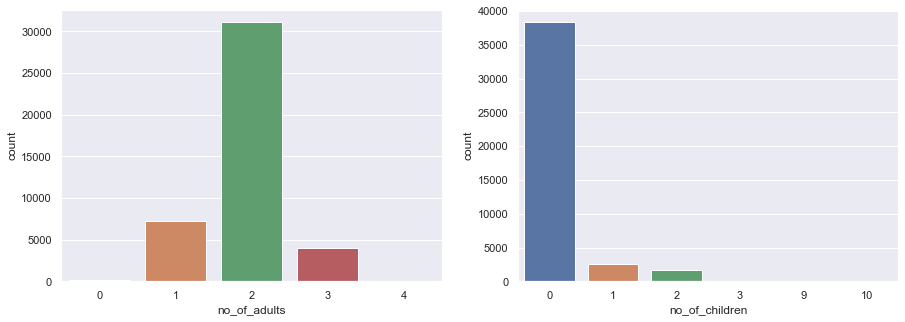

In [19]:
# univariate, no_of_adults, no_of_children

fig,ax=plt.subplots(1,2, figsize=(15,5))
sns.countplot(data=data, x="no_of_adults", ax=ax[0]);
sns.countplot(data=data, x="no_of_children", ax=ax[1]);

- Most of the bookings are made for 2 adults and 0 children. There are couple large outliers (~9 or 10 no_of_children) which could also be real data, e.g., if booking was made for a school trip/cohort

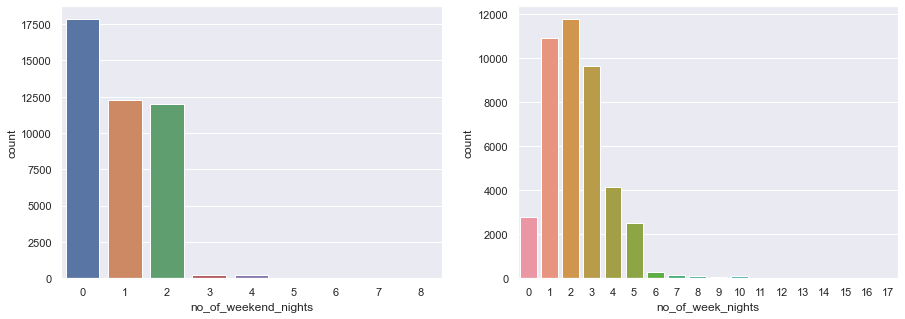

In [20]:
# univariate, no_of_weekend_nights, no_of_week_nights

fig,ax=plt.subplots(1,2, figsize=(15,5))
sns.countplot(data=data, x="no_of_weekend_nights", ax=ax[0]);
sns.countplot(data=data, x="no_of_week_nights", ax=ax[1]);

- Max no_of_weekend_nights is 0 indicating reservations made included only the weekdays. Some reservations include 1 or 2 (either Sat/ Sun or both) weekend days. Negligible number of reservations include 3, 4 or even higher 6-8 no_of_weekend_nights indicating over a month long booking
- Max no_of_week_nights is 2 days (guests typically book between 1-3 days). The average > median, indicating data is right skewed

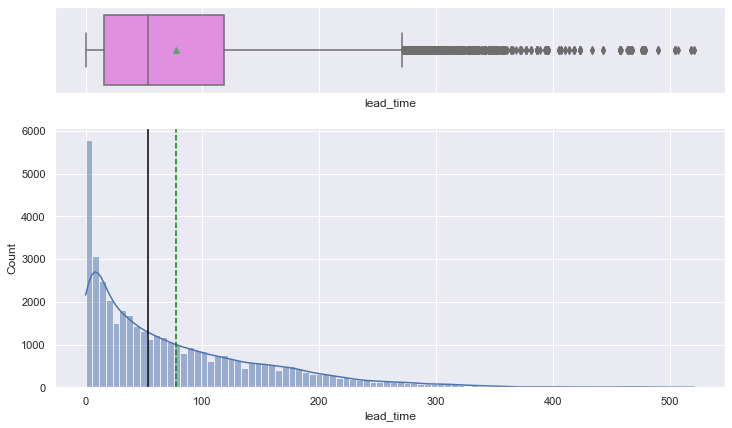

In [21]:
# univariate, lead_time
histogram_boxplot(data, "lead_time", kde=True)

- Majority of guests book closer to check in date with both median and average falling under 3 months/90 days before the check in date. lead_time is right skewed with several outliers in >6months/ 240 days 

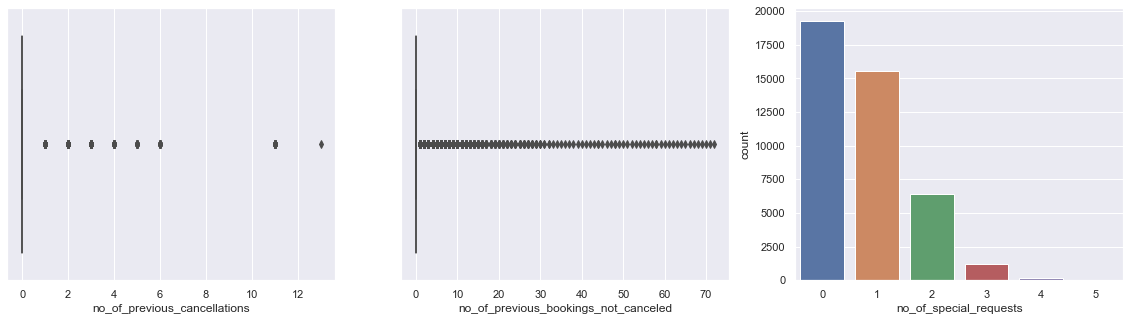

In [22]:
 # univariate, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, no_of_special_requests

fig,ax=plt.subplots(1,3, figsize=(20,5))
sns.boxplot(data=data, x="no_of_previous_cancellations", ax=ax[0]);
sns.boxplot(data=data, x="no_of_previous_bookings_not_canceled", ax=ax[1]);
sns.countplot(data=data, x="no_of_special_requests", ax=ax[2]);

- Most no_of_previous_cancellations is 0. This could be because many are not repeated_guests but are new guests. There are a couple of outliers with as high as 2-12 prior cancellations
- Most no_of_previous_bookings_not_cancelled is also 0, because of the same reason - many are not repeated_guests but are new guests. There are several outliers with as high as 1-70 previous uncancelled bookings. This indicates that of the few repeated_guests, majority have had prior bookings (& thereby good experience at the hotel)
- Majority do not have any special requests and some others have either 1 or 2 special requests. There are couple of outliers with upto 5 special requests

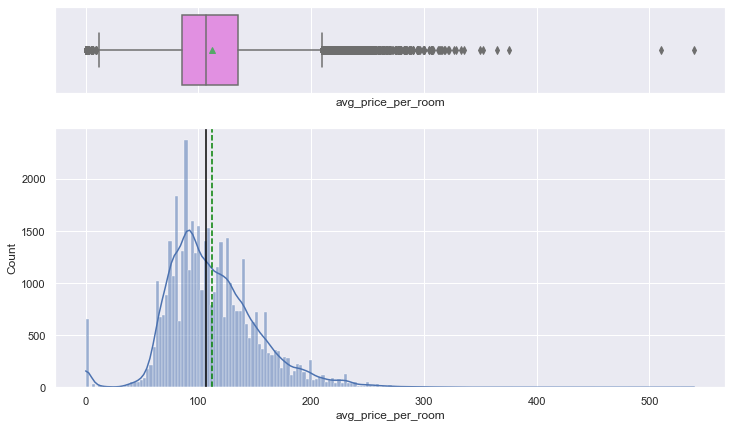

In [23]:
histogram_boxplot(data, "avg_price_per_room", kde =True)

- avg_price_per_room (average price per day of reservation) is skewed right with couple of outliers >£200

In [24]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

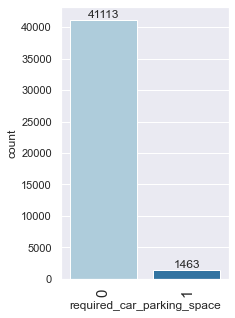

In [25]:
# univariate, required_car_parking_space, repeated_guest

labeled_barplot(data, "required_car_parking_space");

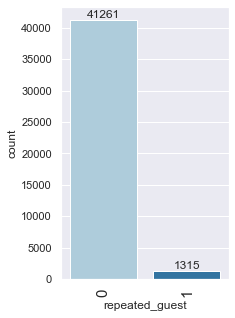

In [26]:
labeled_barplot(data, "repeated_guest")

- Majority do not require car parking space (likely not local)
- Majority are not repeated_guests

In [27]:
# univariate, arrival_year, arrival_month, arrival_day ---> arrival_date_combined
# An impossibe date February 29 2018 was identified in the dataset occuring 35 times, to be dropped

data.loc[(data["arrival_year"]==2018) & (data["arrival_month"]==2) & (data["arrival_date"]==29)].count()\
        ["arrival_date"]

35

In [28]:
data.drop(data[(data["arrival_year"]==2018) & (data["arrival_month"]==2) & \
                          (data["arrival_date"]==29)].index, inplace=True)
data.shape

(42541, 18)

- There are 42541 rows after dropping the impossible date 29th feb 2018

In [29]:
# combining arrival_year, arrival_month & arrival_date to arrival_date_combined

from datetime import datetime
data["arrival_date_combined"] = pd.to_datetime(data.arrival_year.astype(str)+'/'+ \
                                               data.arrival_month.astype(str)+'/'+ \
                                               data.arrival_date.astype(str))

In [30]:
print(data["arrival_date_combined"].min())
print(data["arrival_date_combined"].max())

2017-07-01 00:00:00
2019-08-31 00:00:00


- Dataset has dates between July, 2017 - August, 2019

In [31]:
data = data.drop(["arrival_year", "arrival_date", "arrival_date_combined"],axis=1) #dropping arrival_year and arrival_date

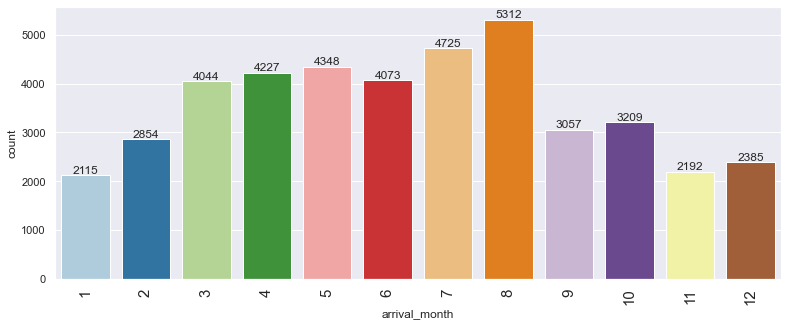

In [32]:
labeled_barplot(data, "arrival_month")

- more bookings are made for arrival_month falling over summer & early-fall months (March-August) over winter months. Since the dataset has enteries from July, 2017 - August, 2019; months July & August are counted for all 3 years whereas the remaining months are counted for only 2 years. This could also increase the count for these months in comparison to other months

In [33]:
# We will combine summer months (March-August) & winter months (September-February)
data["arrival_month"] = data["arrival_month"].astype("object")

data.loc[data.arrival_month==1, "arrival_month"] = "Winter"
data.loc[data.arrival_month==2, "arrival_month"] = "Winter"
data.loc[data.arrival_month==3, "arrival_month"] = "Summer"
data.loc[data.arrival_month==4, "arrival_month"] = "Summer"
data.loc[data.arrival_month==5, "arrival_month"] = "Summer"
data.loc[data.arrival_month==6, "arrival_month"] = "Summer"
data.loc[data.arrival_month==7, "arrival_month"] = "Summer"
data.loc[data.arrival_month==8, "arrival_month"] = "Summer"
data.loc[data.arrival_month==9, "arrival_month"] = "Winter"
data.loc[data.arrival_month==10, "arrival_month"] = "Winter"
data.loc[data.arrival_month==11, "arrival_month"] = "Winter"
data.loc[data.arrival_month==12, "arrival_month"] = "Winter"

data["arrival_month"] = data["arrival_month"].astype("category")

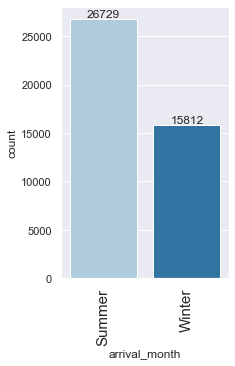

In [34]:
# univariate, arrival_month
labeled_barplot(data, "arrival_month")

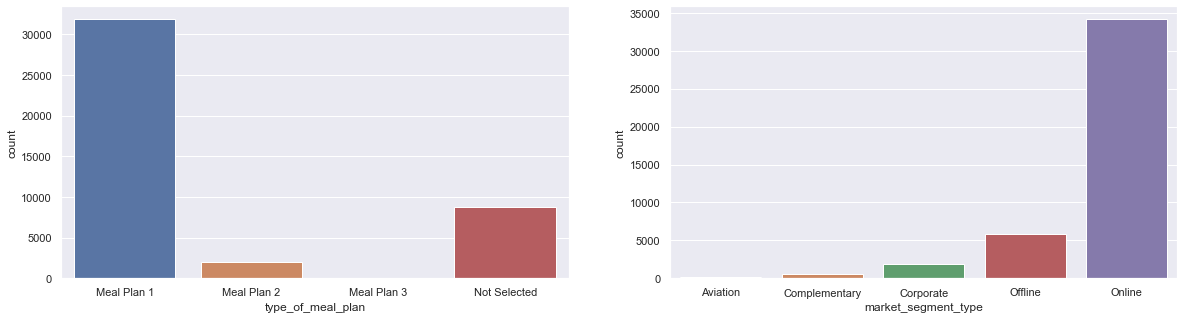

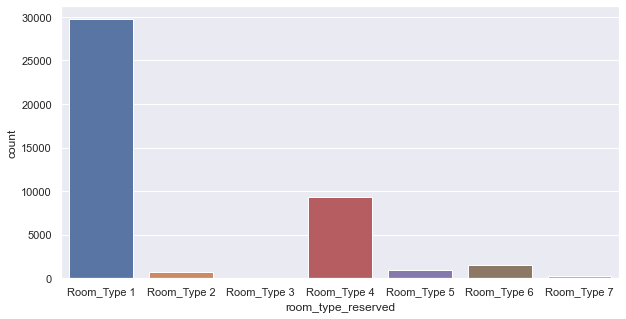

In [35]:
# univariate, type_of_meal_plan, room_type_reserved, market_segment_type, booking_status

fig,ax=plt.subplots(1,2, figsize=(20,5))
sns.countplot(data=data, x="type_of_meal_plan", ax=ax[0]);
sns.countplot(data=data, x="market_segment_type", ax=ax[1]);
plt.show()
plt.figure(figsize=(10,5))
sns.countplot(data=data, x="room_type_reserved");
plt.show()

- Most booking are made for Meal Plan 1 (i.e., breakfast only) and negligible for Meal Plan 3 (i.e, all 3 meals). Several do not select the meal plan
- Most bookings made are online, followed by offline, corporate & then complimentary
- Most bookings are made with preference for Room_type 1, followed by Room_type 4 & Room_type 6

In [36]:
# We will combine Meal Plan 3 with Meal Plan 2
data["type_of_meal_plan"] = data["type_of_meal_plan"].astype("object")
data["room_type_reserved"] = data["room_type_reserved"].astype("object")

data.loc[data.type_of_meal_plan=="Meal Plan 2", "type_of_meal_plan"] = "Not_Meal_Plan 1"
data.loc[data.type_of_meal_plan=="Meal Plan 3", "type_of_meal_plan"] = "Not_Meal_Plan 1"

# We will combine Room_Type 2,3,5 and 7
data.loc[data.room_type_reserved =="Room_Type 2", "room_type_reserved"] = "Others"
data.loc[data.room_type_reserved =="Room_Type 3", "room_type_reserved"] = "Others"
data.loc[data.room_type_reserved =="Room_Type 5", "room_type_reserved"] = "Others"
data.loc[data.room_type_reserved =="Room_Type 7", "room_type_reserved"] = "Others"

data["type_of_meal_plan"] = data["type_of_meal_plan"].astype("category")
data["room_type_reserved"] = data["room_type_reserved"].astype("category")

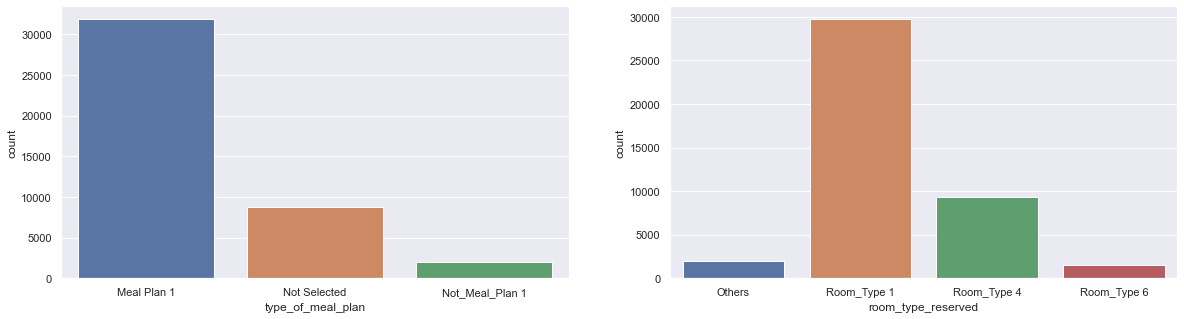

In [37]:
# Re-univariate, type_of_meal_plan, room_type_reserved

fig,ax=plt.subplots(1,2, figsize=(20,5))
sns.countplot(data=data, x="type_of_meal_plan", ax=ax[0]);
sns.countplot(data=data, x="room_type_reserved", ax=ax[1]);
plt.show()

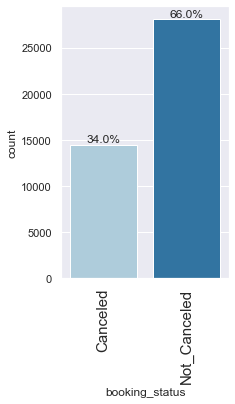

In [38]:
labeled_barplot(data, "booking_status", perc=True)

- Over 66% of bookings are not cancelled & 33% are

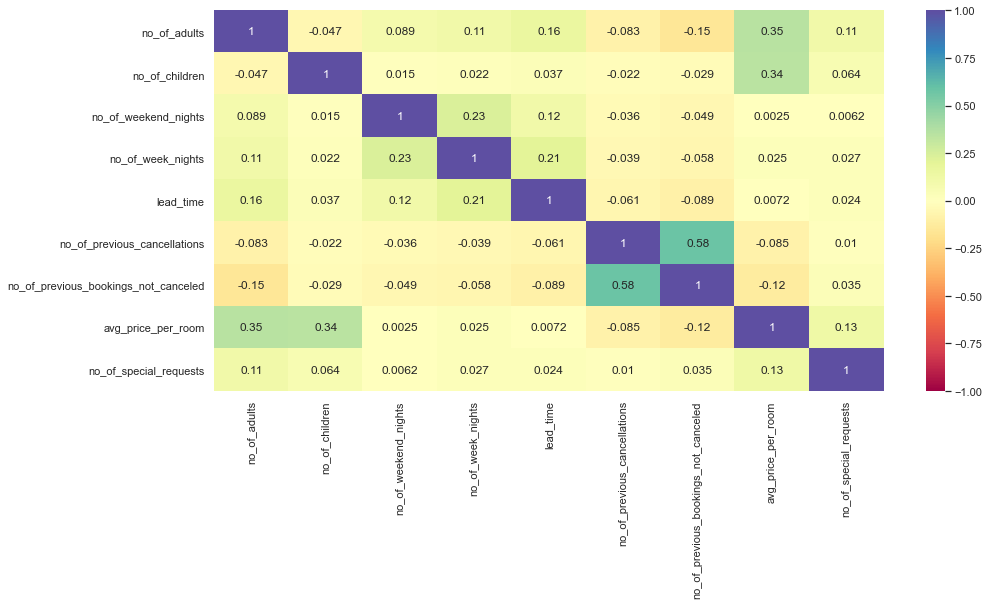

In [39]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.show()

 - linear correlation of 0.35 and 0.34 observed b/w avg_price_per_room (average price per reservation of day)& no_of_adults & no_of_children inicating weak relationship, which makes intuitive sense
 - linear correlation of 0.23 observed b/w no_of_weekend_nights & no_of_week_nights indicating very weak relationships. If the no_of_week_nights is high, it's likely reservation was made for longer duration (also covering more weekends)
 - linear correlation of 0.21 observed b/w lead_time & no_of_week_nights (weak relationship), indicating longer trips are booked in advance
 - Strong linear correlation of 0.58 observed b/w no_of_previous_bookings_not_canceled & no_of_previous_cancelations. This is likely data for returning guests indicating as more bookings are made, both no. of canceled and uncanceled bookings increase

In [40]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

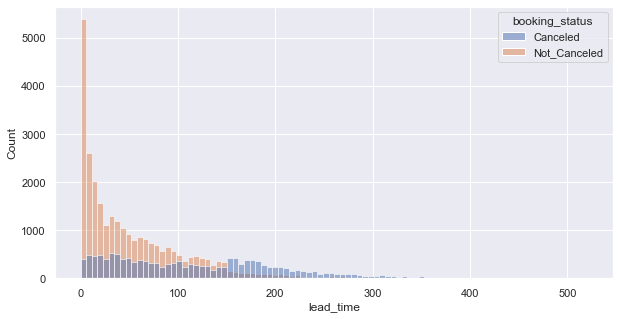

In [41]:
# bivariate, lead_time(how in advance before check-in are bookings made) & booking_status

plt.figure(figsize=(10,5))
sns.histplot(data=data, x="lead_time", hue="booking_status");

- As the lead_time increases, i.e, as time between bookings and actual arrival/check-in, ratio of (Not_Canceled/Canceled) booking_status decreases. This indicates perhaps the need to cap how far in advance guests are able to make their reservations

booking_status  Canceled  Not_Canceled    All
arrival_month                                
All                14480         28061  42541
Summer             10795         15934  26729
Winter              3685         12127  15812
------------------------------------------------------------------------------------------------------------------------


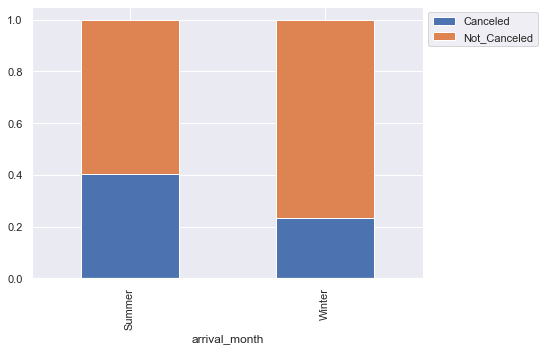

In [42]:
# bivariate, arrival_month & booking_status

stacked_barplot(data, "arrival_month", "booking_status")

- While maximum bookings were made over summer & early-fall i.e, 3rd-8th or March-Aug, these months also had a high cancelation rate of >30%
- While lesser bookings were made over late-fall and winter i.e, 9th-12th, 1st-2nd or Sept-Feb, these months had low cancelation rates of ~20%

booking_status  Canceled  Not_Canceled   All
repeated_guest                              
1                      9          1302  1311
All                    9          1302  1311
------------------------------------------------------------------------------------------------------------------------


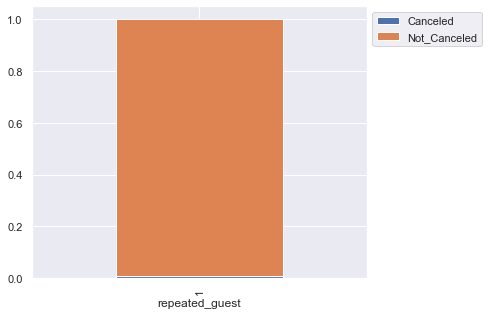

In [43]:
# bivariate, repeated_guest & booking_status

stacked_barplot(data[data["repeated_guest"]==1], "repeated_guest", "booking_status") 

- Of the 1311 repeated_guests, 1302 have Not_Canceled & only 9 have Canceled

no_of_previous_cancellations    0    1   2   3   4   5   6  11  13   All
repeated_guest                                                          
1                             868  248  66  47  24  16  16  25   1  1311
All                           868  248  66  47  24  16  16  25   1  1311
------------------------------------------------------------------------------------------------------------------------


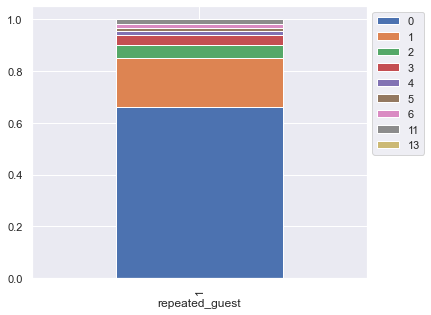

In [44]:
# bivariate, repeated_guest & no_of_previous_cancellations

stacked_barplot(data[data["repeated_guest"]==1], "repeated_guest", "no_of_previous_cancellations")

- Of the 1311 repeated_guests, 868 have 0 previous cancellations (66%) & 248 have 1 previous cancellatio (28%) & remaining have more (all the way upto 13 previous cancellations)

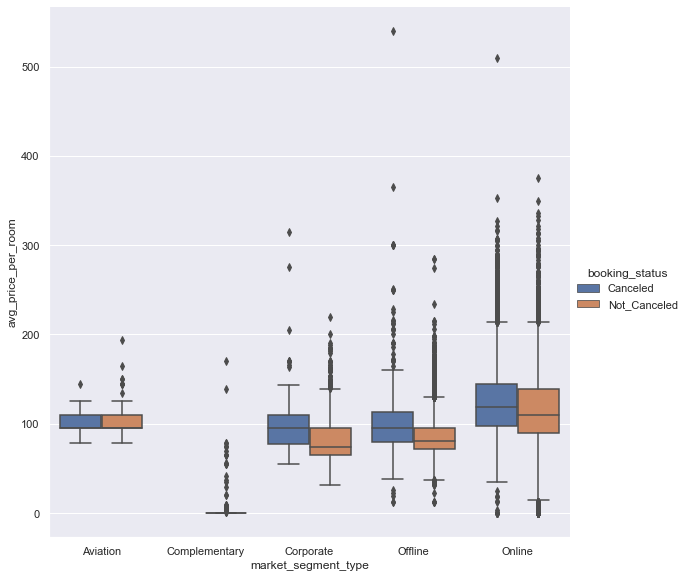

In [45]:
# multivariate, avg_price_per_room, market_segment_type & booking_status

sns.catplot(data=data, y="avg_price_per_room", x="market_segment_type", hue="booking_status", kind="box", \
            height=8);

- Room prices are dynamic in nature. The min, median & max avg_price_per_room for online market segment is higher than other segments such as aviation, corporate & offline
- Across all market segments, min, median & max avg_price_per_room are higher where bookings have been canceled than when bookings have not been canceled
- Complimentary rooms have the lowest avg_price_per_room across market segments, and have 0 cancellations

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        14480         28061  42541
0                           8747         10457  19204
1                           4344         11217  15561
2                           1389          4991   6380
3                              0          1230   1230
4                              0           150    150
5                              0            16     16
------------------------------------------------------------------------------------------------------------------------


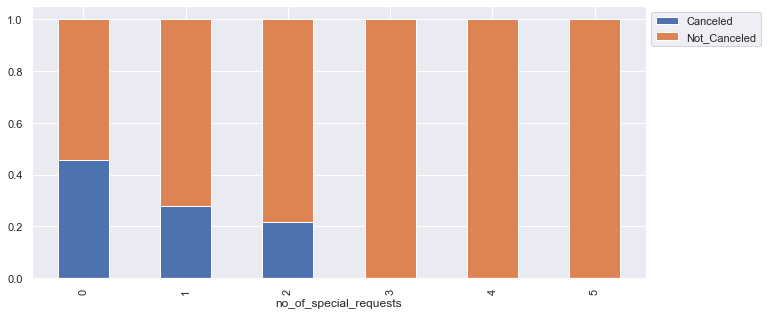

In [46]:
# bivariate, no_of_special_requests, booking_status

stacked_barplot(data, "no_of_special_requests", "booking_status")

- More bookings are cancelled when no special_requests are made. Bookings with 3 or more no_of_special_requests have 0 cancellations

booking_status      Canceled  Not_Canceled    All
room_type_reserved                               
All                    14480         28061  42541
Room_Type 1             9219         20488  29707
Room_Type 4             3682          5679   9361
Room_Type 6              826           712   1538
Others                   753          1182   1935
------------------------------------------------------------------------------------------------------------------------


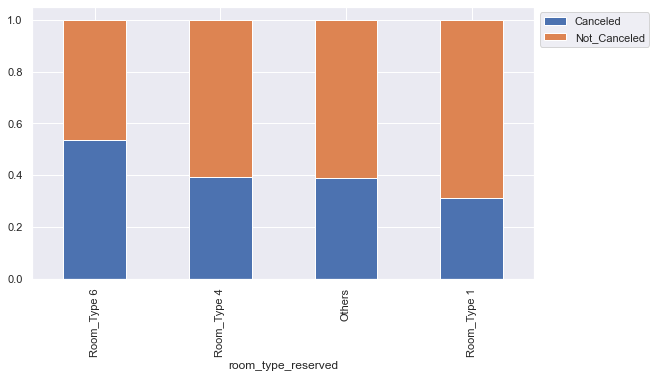

In [47]:
# bivariate, room_type_reserved, booking_status

stacked_barplot(data, "room_type_reserved", "booking_status")

- Majority of bookings were made with Room_Type1, and then followed by Room_Type4 and Room_Type6. However, higher fractions of cancellations wer made in the order Room_Type6 (>50%), Room_Type4 & Room_Type1(30%)

**Outliers detection using boxplot**

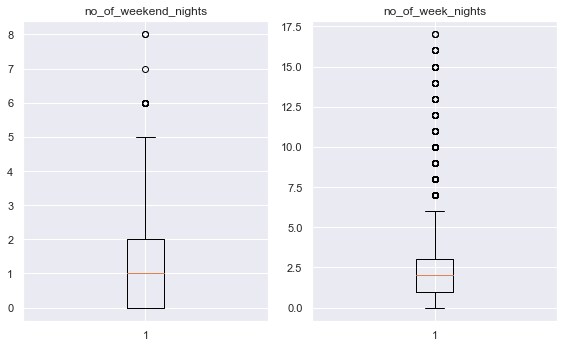

In [48]:
# Outliers in no_of_adults, no_of_children, lead_time, no_of_previous_cancellations, 
# no_of_previous_bookings_not_canceled, avg_price_per_rooms appears to be real data. Treating outliers 
# by capping in this case, may not be the best strategy

# However, hotels are usually bound by local rules preventing guests from staying for short term stays/ rental
# the data in no_of_weekend_nights, no_of_week_nights may be capped

numerical_col = ["no_of_weekend_nights", "no_of_week_nights"]
plt.figure(figsize=(8, 5))

for i, variable in enumerate(numerical_col):
    plt.subplot(1, 2, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [49]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

data = treat_outliers_all(data, numerical_col)

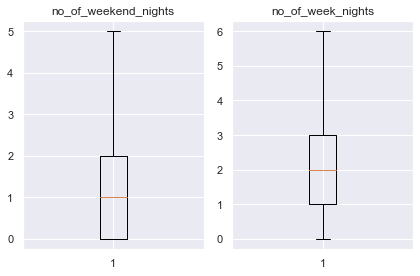

In [50]:
for i, variable in enumerate(numerical_col):
    plt.subplot(1, 2, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

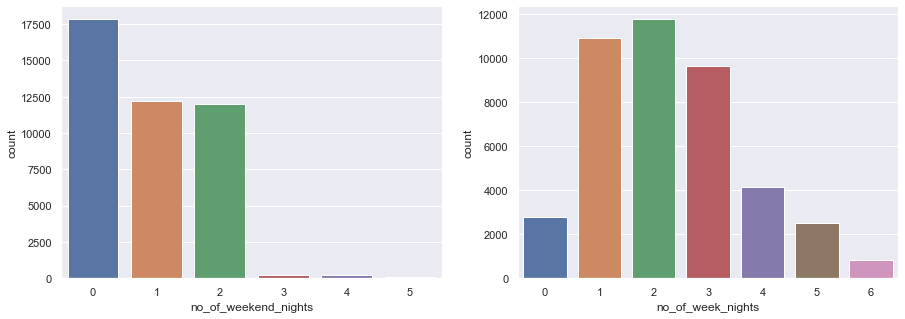

In [51]:
# Re-univariate, no_of_weekend_nights, no_of_week_nights

fig,ax=plt.subplots(1,2, figsize=(15,5))
sns.countplot(data=data, x="no_of_weekend_nights", ax=ax[0]);
sns.countplot(data=data, x="no_of_week_nights", ax=ax[1]);

- Outliers in these columns have been treated

In [52]:
# lead_time has a lot of outliers, which may bias the model. These are all likely real-data, 
# hence column tranformation is preferred

data["cbrt_lead_time"] = np.cbrt(data["lead_time"])
data.drop("lead_time", axis=1, inplace=True)

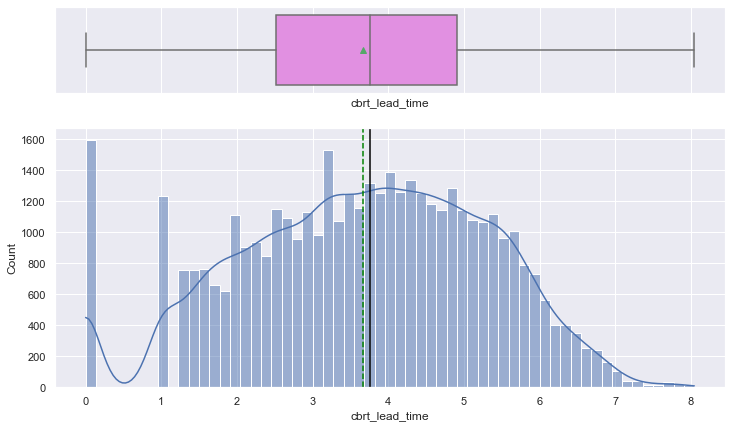

In [53]:
histogram_boxplot(data, "cbrt_lead_time", kde=True)

- Outlier has been tretaed for lead_time, distribution is somewhat normal but not perfect

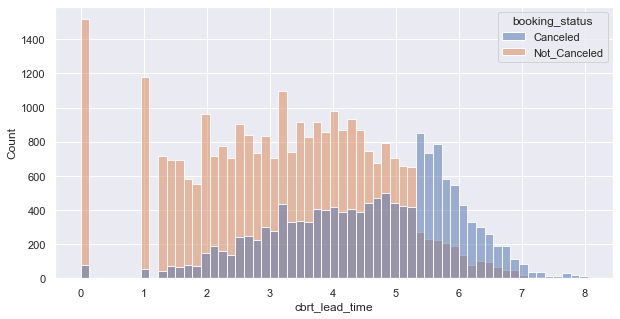

In [54]:
# Re-bivariate, cbrt_lead_time(how in advance before check-in are bookings made) & booking_status

plt.figure(figsize=(10,5))
sns.histplot(data=data, x="cbrt_lead_time", hue="booking_status");

- As the cbrt_lead_time increases, i.e, as time between bookings and actual arrival/check-in, ratio of (Not_Canceled/Canceled) booking_status decreases -- column cbrt transformation has preserved the original information contained in the column

In [55]:
# avg_price_per_room has a lot of outliers, which may bias the model. These are all likely real-data, 
# hence column tranformation is preferred. However, column transformation is unable to remove outliers as well
# we will model using the column as is & re evaluate at a later stage

In [56]:
# no_of_previous_cancellations, no_of_previous_bookings_not_canceled have a lot of outliers, which may bias 
# the model. These are all likely real-data. Binning & converting to categorical may be preferred as any 
# transformed column is also expected to be heavily skewed

data["binned_no_of_previous_cancellations"] = pd.cut( data["no_of_previous_cancellations"], \
                                              [-np.inf, 0, 1, np.inf], \
                                              labels = ["0_canceled_prior_bookings", \
                                                        "1_canceled_prior_bookings", \
                                                        ">1_canceled_prior_bookings"])

data["binned_no_of_previous_bookings_not_canceled"] = pd.cut( data["no_of_previous_bookings_not_canceled"],\
                                                      [-np.inf, 0, 35, np.inf], \
                                                      labels = ["0_uncanceled_prior_bookings", \
                                                                "<35_uncanceled_prior_bookings",
                                                                ">35_uncanceled_prior_bookings"])

In [57]:
data["binned_no_of_previous_cancellations"] = data["binned_no_of_previous_cancellations"].astype("category")
data["binned_no_of_previous_bookings_not_canceled"] = data["binned_no_of_previous_bookings_not_canceled"].\
                                                      astype("category")

data.drop("no_of_previous_cancellations", axis=1, inplace=True)
data.drop("no_of_previous_bookings_not_canceled", axis=1, inplace=True)

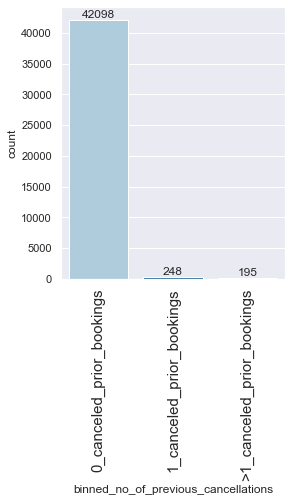

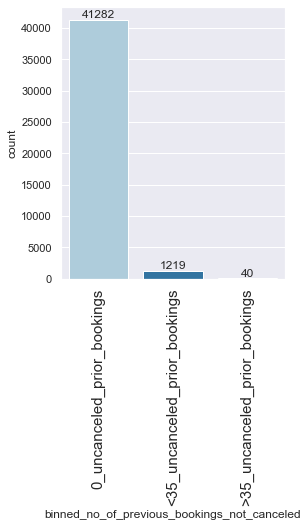

In [58]:
# Re-univariate, no_of_previous_cancellations, no_of_previous_bookings_not_canceled

labeled_barplot(data, "binned_no_of_previous_cancellations")
plt.show()
labeled_barplot(data, "binned_no_of_previous_bookings_not_canceled")
plt.show()

binned_no_of_previous_cancellations  0_canceled_prior_bookings  \
repeated_guest                                                   
1                                                          868   
All                                                        868   

binned_no_of_previous_cancellations  1_canceled_prior_bookings  \
repeated_guest                                                   
1                                                          248   
All                                                        248   

binned_no_of_previous_cancellations  >1_canceled_prior_bookings   All  
repeated_guest                                                         
1                                                           195  1311  
All                                                         195  1311  
------------------------------------------------------------------------------------------------------------------------


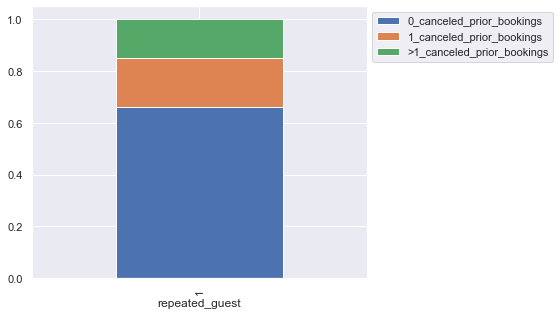

In [59]:
# Re-bivariate, repeated_guest & no_of_previous_cancellations

stacked_barplot(data[data["repeated_guest"]==1], "repeated_guest", "binned_no_of_previous_cancellations")

-  The binned column has reatained the information in the original column. Since the binned column is categorical, outliers are not a concern

 multicollinearity was observed between no_of_previous_cancellations, and no_of_previous_bookings_not_canceled. As the binned columns are categorical, we can use Chi-Square test to see if they have significant relationship or not -
-  Null Hypothesis - There is no association between the two variables    
-  Alternate Hypothesis - There is an association between two variables

In [60]:
crosstab = pd.crosstab(
    data["binned_no_of_previous_cancellations"], data["binned_no_of_previous_bookings_not_canceled"]
)  # Contingency table 

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)
print(p_value)

0.0


- Since p_value is 0.0, there is an association between binned_no_of_previous_cancellations & binned_no_of_previous_bookings_not_canceled columns. We will drop the later and keep the former for model building

In [61]:
data.drop("binned_no_of_previous_bookings_not_canceled", axis=1, inplace=True)

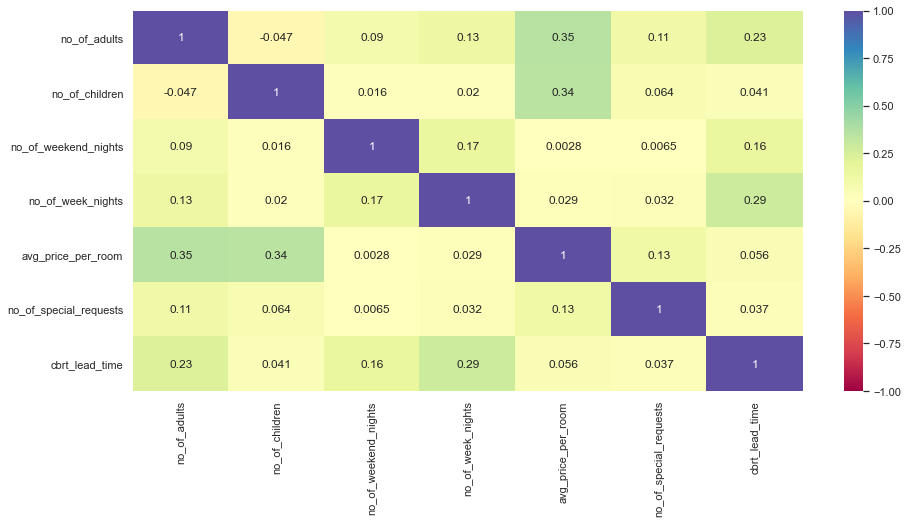

In [62]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.show()

- avg_price_per_room is somwehat correlated with cbrt_lead_time (0.056) , as well correlated with no_of_adults & no_of_children(0.35 and 0.34)

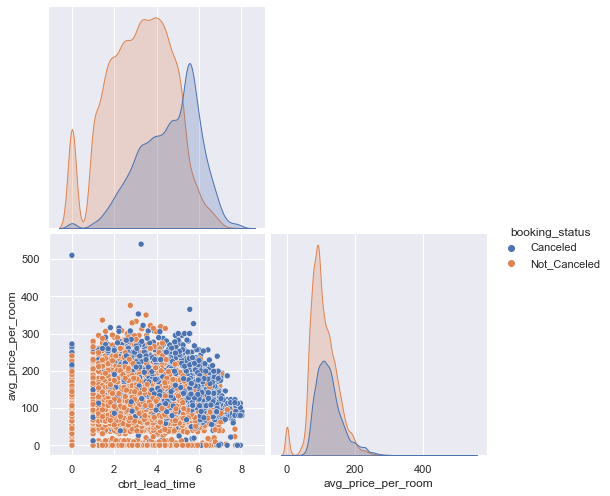

In [63]:
sns.pairplot(data[["cbrt_lead_time", "avg_price_per_room", "booking_status"]], corner=True, \
             height=3.5, hue="booking_status");

- weak correlation observed between cbrt_lead_time & avg_price_per_room. booking_status has a higher odd of being canceled for higher values of both cbrt_lead_time & avg_price_per_room

### EDA Summarized 
- Most bookings are made for 2 adults & 0 children
- Majority of the bookings are made over the weekdays (spread over 1-3 days) in comparison to weekends
- Majority of guests book closer to check in-date with both average & median falling under 3 months (90 days).Lead time (time between booking & check-in) is right skewed with several outliers booking more than 6 months (240 days) in advance.The lead time was transformed via a cube-root transformation (to treat skewness). As the lead time increases, it was observed that the odds of (Cancelation : No Cancelation) increases as well
    - Hotel should introduce policies to restrict how far in advance a booking can be made to decrease the odds for cancelations
- Majority of guests  have no special requests. Some have 1 or 2 requests and only a minority of guests have up-to 5 special requests. More bookings are canceled when no special requests are made. Bookings with 3 or more special requests have 0 cancelations
- Average price per room is skewed right with outliers in the range >£ 200
- Out of 40,000+ guests, less than 1500 guests indicated needing a parking spot. Out of 40,000+ guests, less than 1500 guests were found to be repeat guests.Out of the <1500 repeat guests, more than 60% have 0 prior canceled bookings and only less than 10% have more than 1 prior canceled bookings 
- Dataset has entries between July 2017- August 2019 ; Summer (March-August) & Winter (September-February). More bookings are made over the summer months (26K+) over the winter months (15K+). About 40% and 20% of all bookings are canceled in summer and winter months respectively
- Majority of customers have the following room order preference: Room type 1 >  type 4 > type 6 .Cancelation follows the following room order preference: Room type 1 < type 4 < type 6
    - Hence, a guest preferring a room type 1 is less likely to cancel. Hotel needs to communicate these findings to market each room appropriately
- Room prices are dynamic in nature. Prices are higher in online market segment, than other segments like aviation, corporate and offline. Across all segments, bookings have been canceled in instances where prices are higher & not canceled when prices are lower.There are no cancelations in Complimentary category



- Correlations:
    - Correlation observed b/w price per room & no of adults & children which makes intuitive sense
    - Correlation observed no of week nights and weekend nights (as longer stays will cover more of both)
    - Linear correlation observed b/w lead time & no of week nights indicating longer trips are booked in advance
    - Strong relationship observed between previous bookings not canceled & no of previous cancelations (verified by statistical tests)
    - Weak correlation observed b/w lead time & price with odd of cancelations being high for both high lead time and high price













In [64]:
# outcome_will be set as 0 if a person cancels the booking and 1 if they don't

data["booking_status"] = data["booking_status"].apply(lambda x: 0 if x == "Canceled" else 1)

In [65]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

X = pd.get_dummies(X, drop_first=True)

### Collinearity Check

In [66]:
vif_series = pd.Series(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
    index=X.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

no_of_adults                                                      20.315657
no_of_children                                                     2.171673
no_of_weekend_nights                                               2.139586
no_of_week_nights                                                  4.239167
avg_price_per_room                                                17.491668
no_of_special_requests                                             2.035305
cbrt_lead_time                                                     7.978110
type_of_meal_plan_Not Selected                                     1.598830
type_of_meal_plan_Not_Meal_Plan 1                                  1.132816
required_car_parking_space_1                                       1.069815
room_type_reserved_Room_Type 1                                    16.416383
room_type_reserved_Room_Type 4                                     5.752324
room_type_reserved_Room_Type 6                       

In [67]:
# dropping market_segment_type_Online 

X.drop("market_segment_type_Online", axis=1, inplace=True)

vif_series = pd.Series(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
    index=X.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

no_of_adults                                                      18.151024
no_of_children                                                     2.134410
no_of_weekend_nights                                               2.129514
no_of_week_nights                                                  4.164848
avg_price_per_room                                                13.369213
no_of_special_requests                                             2.030646
cbrt_lead_time                                                     7.313167
type_of_meal_plan_Not Selected                                     1.562455
type_of_meal_plan_Not_Meal_Plan 1                                  1.121380
required_car_parking_space_1                                       1.069806
room_type_reserved_Room_Type 1                                     9.848559
room_type_reserved_Room_Type 4                                     4.504211
room_type_reserved_Room_Type 6                       

In [68]:
X.drop("no_of_adults", axis=1, inplace=True)
vif_series = pd.Series(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
    index=X.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

no_of_children                                                    2.101060
no_of_weekend_nights                                              2.119103
no_of_week_nights                                                 4.125846
avg_price_per_room                                                9.388127
no_of_special_requests                                            2.018565
cbrt_lead_time                                                    6.738801
type_of_meal_plan_Not Selected                                    1.545798
type_of_meal_plan_Not_Meal_Plan 1                                 1.113697
required_car_parking_space_1                                      1.069108
room_type_reserved_Room_Type 1                                    9.126001
room_type_reserved_Room_Type 4                                    4.082278
room_type_reserved_Room_Type 6                                    2.296145
arrival_month_Winter                                             

- Multicolinearity has been removed to a large extent (All VIFs <10). We will now split the dataset and build our model using sk-learn and statsmodel

In [69]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [70]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (29778, 19)
Shape of test set :  (12763, 19)
Percentage of classes in training set:
1    0.659077
0    0.340923
Name: booking_status, dtype: float64
Percentage of classes in test set:
1    0.660895
0    0.339105
Name: booking_status, dtype: float64


### Model Evaluation Criterion

Model can make a wrong prediction as:
- Predicting a person will cancel a booking, when a person will not cancel the booking (False Negatives).
This will result in loss of potential revenue & business for the hotel chain
- Predicting a person will not cancel a booking, when a person will cancel the booking (False Positives)
This will result in last minute cancellations -loss of revenue due to hiring of human resources for guests who will no longer come, as well as profit-margin loss in case of trying to price the room cheap to get last minute bookings

*  `f1_score` should be maximized, the greater the f1_score higher the chances of identifying both the classes correctly


* The model_performance_classification_statsmodels function will be used to check the model performance of models
* The confusion_matrix_statsmodels function will be used to plot confusion matrix

In [71]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [72]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Building a Logistic Regression model

### with Sklearn library

In [73]:
lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(X_train, y_train)

In [74]:
# predicting on training set
y_pred_train = lg.predict(X_train)

### Model performance evaluation

In [75]:
print("Training set performance:")

sklearn_perf_train = pd.DataFrame(
        {"Accuracy": accuracy_score(y_train, y_pred_train), \
         "Recall": recall_score(y_train, y_pred_train), \
         "Precision": precision_score(y_train, y_pred_train),\
         "F1": f1_score(y_train, y_pred_train),},
        index=[0],\
        )
sklearn_perf_train

Training set performance:


Accuracy    Recall  Precision        F1
0  0.787058  0.867981   0.819581  0.843087

In [76]:
# predicting on the test set
y_pred_test = lg.predict(X_test)

In [77]:
print("Test set performance:")

sklearn_perf_test = pd.DataFrame(
        {"Accuracy": accuracy_score(y_test, y_pred_test), \
         "Recall": recall_score(y_test, y_pred_test), \
         "Precision": precision_score(y_test, y_pred_test),\
         "F1": f1_score(y_test, y_pred_test),},
        index=[0],\
        )
sklearn_perf_test

Test set performance:


Accuracy    Recall  Precision        F1
0  0.788843  0.873859   0.818818  0.845444

### Observations

- The F1 score on the training and testing sets are 0.843 and 0.845, which means model is showing generalized performance on the dataset

In [78]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

X = pd.get_dummies(X, drop_first=True)
# adding constant
X = sm.add_constant(X)

In [79]:
vif_series = pd.Series(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
    index=X.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                                             276.928126
no_of_adults                                                        1.434166
no_of_children                                                      1.987386
no_of_weekend_nights                                                1.061505
no_of_week_nights                                                   1.134818
avg_price_per_room                                                  2.198903
no_of_special_requests                                              1.106194
cbrt_lead_time                                                      1.314084
type_of_meal_plan_Not Selected                                      1.272886
type_of_meal_plan_Not_Meal_Plan 1                                   1.084232
required_car_parking_space_1                                        1.033103
room_type_reserved_Room_Type 1                                      5.632753
room_type_reserved_Room_Type 4           

In [80]:
X.drop("market_segment_type_Online", axis=1, inplace=True)
X.drop("market_segment_type_Offline", axis=1, inplace=True)
X.drop("market_segment_type_Corporate", axis=1, inplace=True)
vif_series = pd.Series(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
    index=X.columns,
    dtype=float,
)

In [81]:
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                                             66.489441
no_of_adults                                                       1.375218
no_of_children                                                     1.982149
no_of_weekend_nights                                               1.057565
no_of_week_nights                                                  1.131631
avg_price_per_room                                                 2.036009
no_of_special_requests                                             1.055247
cbrt_lead_time                                                     1.287004
type_of_meal_plan_Not Selected                                     1.172352
type_of_meal_plan_Not_Meal_Plan 1                                  1.062956
required_car_parking_space_1                                       1.027455
room_type_reserved_Room_Type 1                                     5.625614
room_type_reserved_Room_Type 4                       

- As all VIFs ~<5, multicollinearity has been removed 

In [82]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [83]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                29778
Model:                          Logit   Df Residuals:                    29759
Method:                           MLE   Df Model:                           18
Date:                Wed, 20 Oct 2021   Pseudo R-squ.:                  0.2799
Time:                        23:29:44   Log-Likelihood:                -13760.
converged:                      False   LL-Null:                       -19107.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================================================
                                                                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------
const                                                              5.6877      0.135     41.988      0.000       5.422       5.953
no_of_adults                                                       0.1698      0.033      5.080      0.000       0.104       0.235
no_of_children                                                    -0.0975      0.045     -2.158      0.031      -0.186      -0.009
no_of_weekend_nights                                              -0.0411      0.017     -2.429      0.015      -0.074      -0.008
no_of_week_nights                                                 -0.0607      0.011     -5.366      0.000      -0.083      -0.039
avg_price_per_room                                                -0.0213      0.001    -37.422      0.000      -0.022      -0.020
no_of_special_requests                                             1.0784      0.021     50.235      0.000       1.036       1.120
cbrt_lead_time                                                    -0.7884      0.013    -62.599      0.000      -0.813      -0.764
type_of_meal_plan_Not Selected                                    -0.6878      0.040    -17.349      0.000      -0.765      -0.610
type_of_meal_plan_Not_Meal_Plan 1                                  0.4850      0.071      6.853      0.000       0.346       0.624
required_car_parking_space_1                                       1.3013      0.110     11.809      0.000       1.085       1.517
room_type_reserved_Room_Type 1                                    -0.2921      0.078     -3.756      0.000      -0.445      -0.140
room_type_reserved_Room_Type 4                                    -0.2945      0.079     -3.717      0.000      -0.450      -0.139
room_type_reserved_Room_Type 6                                     0.2185      0.120      1.817      0.069      -0.017       0.454
arrival_month_Winter                                              -0.0162      0.034     -0.474      0.636      -0.083       0.051
market_segment_type_Complementary                                 17.5367   2744.134      0.006      0.995   -5360.867    5395.941
repeated_guest_1                                                  -0.3772      0.179     -2.107      0.035      -0.728      -0.026
binned_no_of_previous_cancellations_1_canceled_prior_bookings      1.3891      0.471      2.946      0.003       0.465       2.313
binned_no_of_previous_cancellations_>1_canceled_prior_bookings     2.3902      1.044      2.290      0.022       0.344       4.436
==================================================================================================================================
"""

In [84]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


Accuracy  Recall  Precision        F1
0  0.772349  0.8663   0.803611  0.833779

- The training F1 using statsmodel (0.833) is comparable to that with sk-learn. The model isn't that much better
- Negative values of coefficients indicates that booking is more likely to be canceled with an increase of that attribute value & vice versa for positive values of coefficients
- Any attribute with a p value of <0.05 will be considered significant
- We will drop the column with the highest p-value.
  - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
  - Repeat the above two steps till there are no columns with p-value > 0.05.

In [85]:
# running a loop to drop variables with high p-value

# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_weekend_nights', 'no_of_week_nights', 'avg_price_per_room', 'no_of_special_requests', 'cbrt_lead_time', 'type_of_meal_plan_Not Selected', 'type_of_meal_plan_Not_Meal_Plan 1', 'required_car_parking_space_1', 'room_type_reserved_Room_Type 1', 'room_type_reserved_Room_Type 4', 'repeated_guest_1', 'binned_no_of_previous_cancellations_1_canceled_prior_bookings']


In [86]:
X_train1 = X_train[selected_features]

In [87]:
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp=False)

print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                29778
Model:                          Logit   Df Residuals:                    29764
Method:                           MLE   Df Model:                           13
Date:                Wed, 20 Oct 2021   Pseudo R-squ.:                  0.2819
Time:                        23:29:46   Log-Likelihood:                -13721.
converged:                       True   LL-Null:                       -19107.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
const                                                             5.7387      0.124     46.258      0.000   

- All p values are now <0.05. We will consider columns in X_train1 as final and lg1 as the final model

###  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [88]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns)

Odds   Change_odd%
const                                               310.662714  30966.271435
no_of_adults                                          1.203417     20.341695
no_of_weekend_nights                                  0.958035     -4.196452
no_of_week_nights                                     0.941352     -5.864831
avg_price_per_room                                    0.978584     -2.141565
no_of_special_requests                                2.956435    195.643491
cbrt_lead_time                                        0.450457    -54.954336
type_of_meal_plan_Not Selected                        0.500418    -49.958161
type_of_meal_plan_Not_Meal_Plan 1                     1.636813     63.681316
required_car_parking_space_1                          3.872028    287.202758
room_type_reserved_Room_Type 1                        0.735929    -26.407056
room_type_reserved_Room_Type 4                        0.734002    -26.599751
repeated_guest_1                                     47.239698   4623.969818
binned_no_of_previous_cancellations_1_canceled_...    0.058671    -94.132905

- Attributes contributing to No_Cancelations
    - No_of_adults, No_of_special_requests, type_meal_plan_selected_MealPlan1, required_car_parking_space_1, & repeated_guests
- Repeated_guests contribute the maximum to No_Cancelations (intuitive as they have likely had prior good experience staying at the hotel). Guests that are specific in their requests or their requirements like meal plan & parking or planning to stay with larger group are also less likely to cancel intuitively


- Attributes contribuiting to Cancelations
    - No_of_weekend_nights, no_of_week_nights, avg_price_per_room, cbrt_lead_time, binned_no_of_previous_cancellations_1_canceled_prior_bookings
- Guests who have previously canceled a booking (intuitive given past behavior) or bookings with more expensive rates are the most contributing to Cancelations. Guests who plan longer stays covering many weekdays, weekends, or planning way in advance (months before checking) are likely to contribute to Cancelations. 

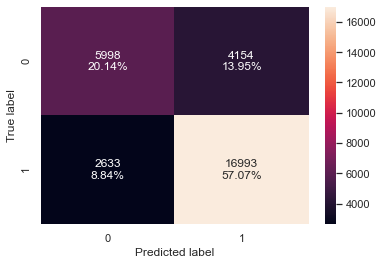

In [89]:
#### Checking model performance on the training set

# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train)

In [90]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg1, X_train1, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0   0.77208  0.865841   0.803566  0.833542

#### ROC-AUC
- On training set

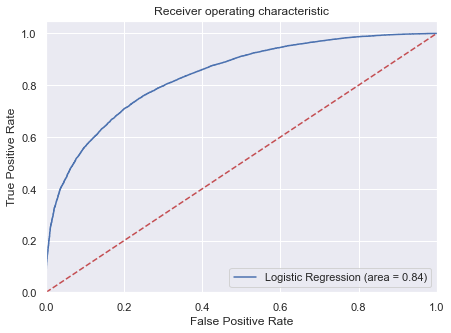

In [91]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a good performance on training set.

### Model Performance Improvement
### Optimal threshold using AUC-ROC curve

In [92]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.6538190359033208


- Optimal threshold as per AUC-ROC curve is 0.653

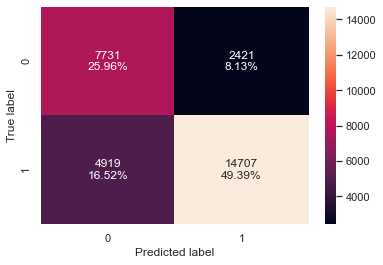

In [93]:
#### Checking model performance on training set

# creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)

In [94]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy    Recall  Precision        F1
0  0.753509  0.749363   0.858652  0.800294

- Precision of the model has increased but other metrics have decreased

#### Let's use Precision-Recall curve and see if we can find a better threshold

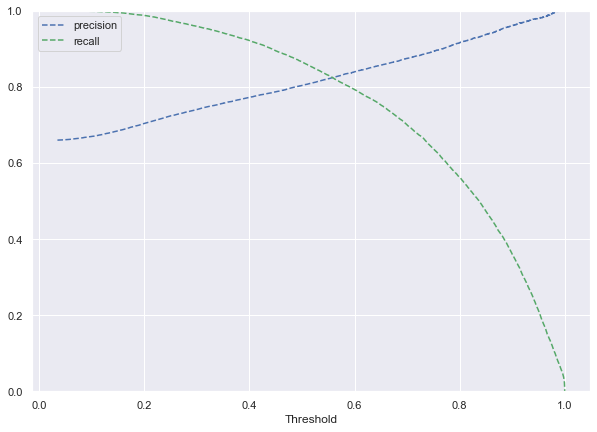

In [95]:
y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])



plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.56, we get balanced recall and precision

In [96]:
# setting the threshold
optimal_threshold_curve = 0.56

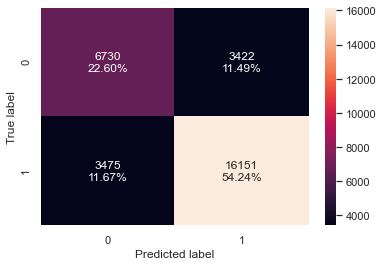

In [97]:
#### Checking model performance on training set
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_curve)

In [98]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy    Recall  Precision        F1
0  0.768386  0.822939   0.825167  0.824052

- Model is performing ok on the training data

### Let's check the performance on the test set
**Dropping the columns from the test set that were dropped from the training set**

In [99]:
X_test1 = X_test[list(X_train1.columns)]

**Using model with default threshold**

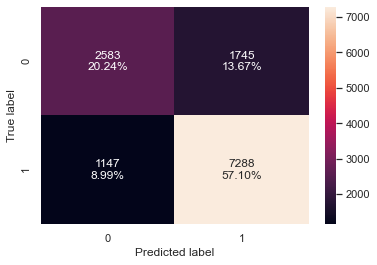

In [100]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test)

In [101]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg1, X_test1, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


Accuracy    Recall  Precision       F1
0  0.773408  0.864019   0.806819  0.83444

* ROC curve on test set

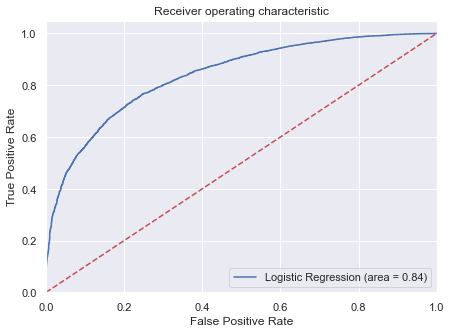

In [102]:
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Using model with threshold=0.653** 

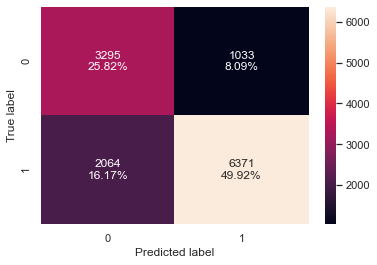

In [103]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc)

In [104]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


Accuracy    Recall  Precision       F1
0  0.757345  0.755305   0.860481  0.80447

**Using model with threshold = 0.56**

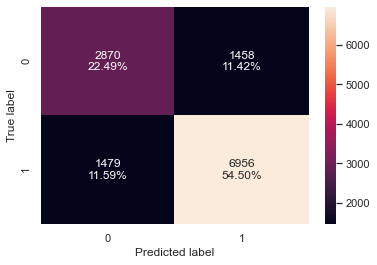

In [105]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_curve)

In [106]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy    Recall  Precision        F1
0  0.769882  0.824659   0.826717  0.825687

In [107]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        sklearn_perf_train.T,
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Sk-learn",
    "Logistic Regression-0.50 Threshold",
    "Logistic Regression-0.65 Threshold",
    "Logistic Regression-0.56 Threshold",
]

print("Training performance comparison:")
print(models_train_comp_df.T)

print("\n")
print("\n")

# testing performance comparison

models_test_comp_df = pd.concat(
    [
        sklearn_perf_test.T,
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Sk-learn",
    "Logistic Regression-0.50 Threshold",
    "Logistic Regression-0.65 Threshold",
    "Logistic Regression-0.56 Threshold",
]

print("Test set performance comparison:")
print(models_test_comp_df.T)

Training performance comparison:
                                    Accuracy    Recall  Precision        F1
Sk-learn                            0.787058  0.867981   0.819581  0.843087
Logistic Regression-0.50 Threshold  0.772080  0.865841   0.803566  0.833542
Logistic Regression-0.65 Threshold  0.753509  0.749363   0.858652  0.800294
Logistic Regression-0.56 Threshold  0.768386  0.822939   0.825167  0.824052




Test set performance comparison:
                                    Accuracy    Recall  Precision        F1
Sk-learn                            0.788843  0.873859   0.818818  0.845444
Logistic Regression-0.50 Threshold  0.773408  0.864019   0.806819  0.834440
Logistic Regression-0.65 Threshold  0.757345  0.755305   0.860481  0.804470
Logistic Regression-0.56 Threshold  0.769882  0.824659   0.826717  0.825687


### Conclusion

-  Model using sklearn library gives F1 values of 0.843 & 0.845 on training & testing datasets, i.e. able to explain over 84.5% of the information
- Optimized threshold for stats library was found to be ~0.56 with a balanced high precision & recall. This model gives F1 values of 0.824 & 0.825 on training & testing datasets, i.e. able to explain over 82.4% of the information
- The models are able to give generalized performance on both the training as well as the testing datasets


As was discussed & explored before,
- Attributes contributing to No_Cancelations
    - No_of_adults, No_of_special_requests, type_meal_plan_selected_MealPlan1, required_car_parking_space_1, & repeated_guests
    -Repeated_guests contribute the maximum to No_Cancelations (intuitive as they have likely had prior good experience staying at the hotel). Guests that are specific in their requests or their requirements like meal plan & parking or planning to stay with larger group are also less likely to cancel intuitively

- Attributes contribuiting to Cancelations
    - No_of_weekend_nights, no_of_week_nights, avg_price_per_room, cbrt_lead_time, binned_no_of_previous_cancellations_1_canceled_prior_bookings
    - Guests who have previously canceled a booking (intuitive given past behavior) or bookings with more expensive rates are the most contributing to Cancelations. Guests who plan longer stays covering many weekdays, weekends, or planning way in advance (months before checking) are likely to contribute to Cancelations

## Building a Decision Tree model

In [108]:
# As decision trees are immune to multicollinearity in comparison to regression models, we will use all 
# the columns in our dataset

X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

X = pd.get_dummies(X, drop_first=True)

In [109]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [110]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
1    0.659077
0    0.340923
Name: booking_status, dtype: float64
Percentage of classes in test set:
1    0.660895
0    0.339105
Name: booking_status, dtype: float64


- The assigned weights for 1 and 0 will be ~0.35 and 0.65 respectively

In [111]:
model = DecisionTreeClassifier(criterion="gini", class_weight={0: 0.65, 1: 0.35}, random_state=1)

In [112]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.65, 1: 0.35}, random_state=1)

In [113]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

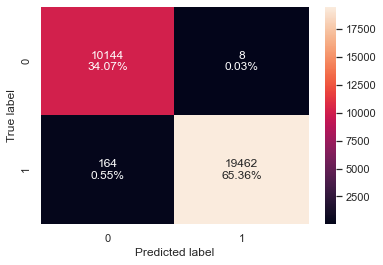

In [114]:
confusion_matrix_sklearn(model, X_train, y_train)

In [115]:
##  Function to calculate performance
def get_perf_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    
    """
    prediction = model.predict(predictors)
    acc = accuracy_score(target, prediction)
    recall = recall_score(target, prediction)
    precision = precision_score(target, prediction)
    f1 = f1_score(target, prediction)

    df_perf1 = pd.DataFrame({"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},index=[0],)
        
    return df_perf1

In [116]:
decision_tree_perf_train = get_perf_score(model, X_train, y_train)
decision_tree_perf_train

Accuracy    Recall  Precision        F1
0  0.994224  0.991644   0.999589  0.995601

- Model is almost perfectly able to classify all points on the training dataset (as known if no restrictions are applied, tree will learn all characteristic of training dataset - chance for overfitting)

#### Checking model performance on test set

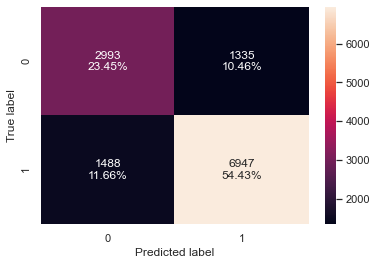

In [117]:
confusion_matrix_sklearn(model, X_test, y_test)

In [118]:
decision_tree_perf_test = get_perf_score(model, X_test, y_test)
decision_tree_perf_test

Accuracy    Recall  Precision       F1
0  0.778814  0.823592   0.838807  0.83113

- F1 on the test data is somewhat comparable to what was obtained using the stats model. While the performance is poorer on the testing data set than training (as expected), it is not way off

In [119]:
## creating a list of column names
feature_names = X_train.columns.to_list()

In [120]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                                             Imp
cbrt_lead_time                                      3.957659e-01
avg_price_per_room                                  2.061163e-01
no_of_special_requests                              1.067211e-01
market_segment_type_Online                          9.029005e-02
no_of_week_nights                                   6.444670e-02
no_of_weekend_nights                                4.181370e-02
no_of_adults                                        2.008182e-02
arrival_month_Winter                                1.549277e-02
type_of_meal_plan_Not Selected                      1.200862e-02
required_car_parking_space_1                        9.708646e-03
room_type_reserved_Room_Type 1                      8.881539e-03
no_of_children                                      8.648294e-03
room_type_reserved_Room_Type 4                      8.032088e-03
type_of_meal_plan_Not_Meal_Plan 1                   5.443015e-03
room_type_reserved_Room_T

-  cbrt(lead_time) is the most important attribute to predict Cancellations according to the decision tree. This is corroborated by what was observed during the EDA (bookings made with higher lead times had a higher odds of cancelations)

### Reducing over fitting

#### Using GridSearch for Hyperparameter tuning of our tree model

In [121]:
# Choose the type of classifier
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.65, 1: 0.35})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.65, 1: 0.35}, criterion='entropy',
                       max_depth=5, min_impurity_decrease=1e-05,
                       random_state=1)

#### Checking performance on training set

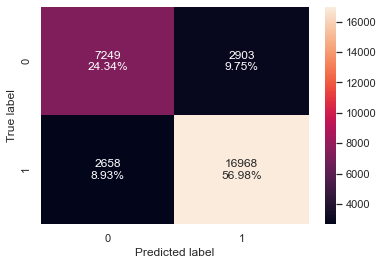

In [122]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [123]:
decision_tree_tune_perf_train = get_perf_score(estimator, X_train, y_train)
decision_tree_tune_perf_train

Accuracy    Recall  Precision        F1
0  0.813251  0.864567   0.853908  0.859204

#### Checking performance on test set

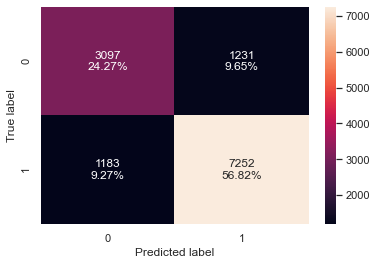

In [124]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [125]:
decision_tree_tune_perf_test = get_perf_score(estimator, X_test, y_test)
decision_tree_tune_perf_test

Accuracy    Recall  Precision        F1
0   0.81086  0.859751   0.854886  0.857312

- The model is giving a generalized result now on both training & testing datasets
- F1 scores are high; 0.859 and 0.857 for training and testing datasets. The pre tuned model is able to explain close to 86% of contained information 

### Visualizing the Decision Tree

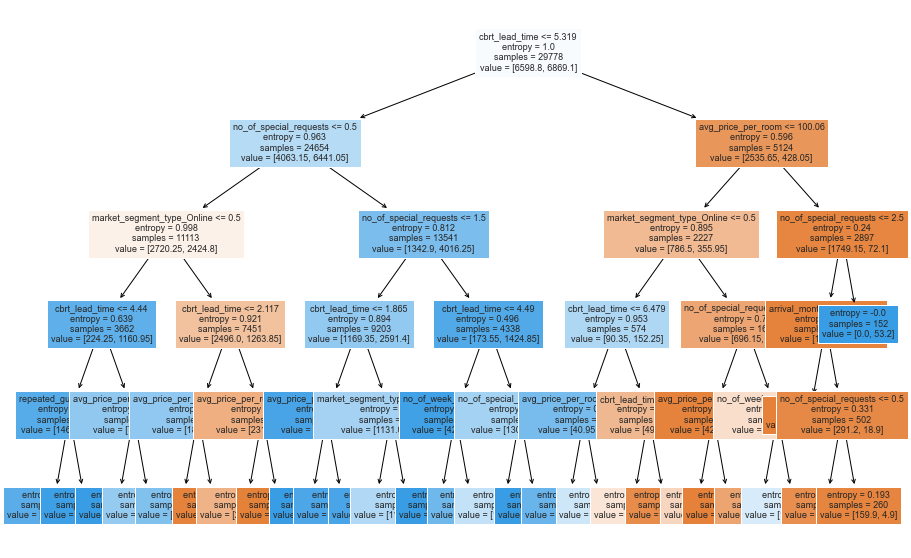

In [126]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [127]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

# Here we will see that importance of features has increased

                                                         Imp
cbrt_lead_time                                      0.429356
no_of_special_requests                              0.255243
market_segment_type_Online                          0.183084
avg_price_per_room                                  0.090217
no_of_week_nights                                   0.022418
arrival_month_Winter                                0.009104
no_of_weekend_nights                                0.007512
repeated_guest_1                                    0.003065
no_of_adults                                        0.000000
binned_no_of_previous_cancellations_1_canceled_...  0.000000
market_segment_type_Offline                         0.000000
market_segment_type_Corporate                       0.000000
market_segment_type_Complementary                   0.000000
room_type_reserved_Room_Type 1                      0.000000
room_type_reserved_Room_Type 6                      0.000000
room_type_reserved_Room_

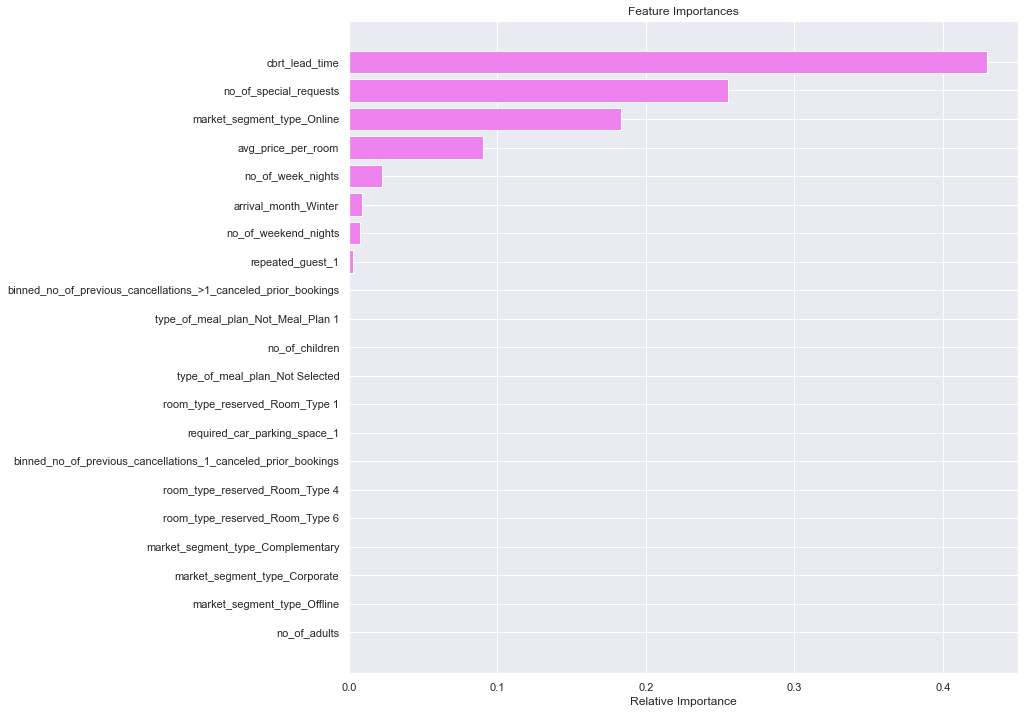

In [128]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- In pre tuned decision tree, cbrt_lead_time is the most important attribute followed by no_of_special_requests, market_segment_type_online & avg_price_per_room to predict cancellations

As was corroborated by EDA as well as other models,
   - bookings with higher lead times had a pattern of higher cancelations as well
   - bookings with more no. of special requests had a pattern of lower cancelations
   - market segment online was excluded from regression fit, as it had collinear dependencies on other attributes, however included in the decsion tree model, as trees are immune to multicollinearity. Online market segment was found to have some of the higher min, median, max avg_price_per_room values compared to any other market segment like offline, aviation, complimentary etc.,
   - avg price per room was found to be higher for canceled bookings than for not canceled bookings (across the board for all market segments) during the EDA process
   - higher no of week nights indicates longer booking duration, which as was observed from the regression fit, has a higher odds of booking cancelations (similar for no of weekend nights) 
   - arrival_month winter (Sep-Feb) was found to have a lesser percentage of booking cancelations than arrival_month summer (March-Aug). Although, also noticed number of bookings in summer months are higher than number of bookings in winter months
   - a repeated guest is less likely to cancel a booking 

### Cost Complexity Pruning

In [129]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [130]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
1    0.659077
0    0.340923
Name: booking_status, dtype: float64
Percentage of classes in test set:
1    0.660895
0    0.339105
Name: booking_status, dtype: float64


In [131]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.65, 1: 0.35})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [132]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000e+00    0.005990
1    -2.710505e-20    0.005990
2    -2.710505e-20    0.005990
3    -2.710505e-20    0.005990
4    -2.710505e-20    0.005990
...            ...         ...
3196  8.335843e-03    0.334138
3197  8.593371e-03    0.342731
3198  1.360951e-02    0.356341
3199  3.401563e-02    0.424372
3200  7.542637e-02    0.499799

[3201 rows x 2 columns]

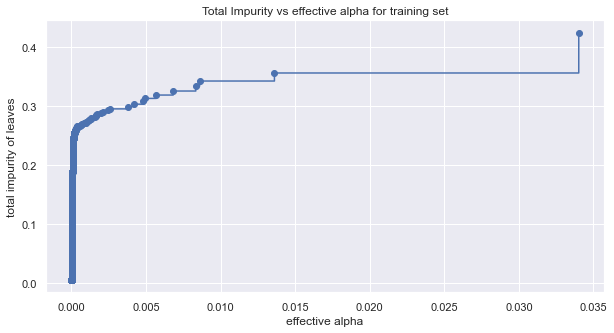

In [133]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [134]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.65, 1: 0.35}
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)


Number of nodes in the last tree is: 1 with ccp_alpha: 0.07542636675714037



For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node

In [135]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

In [136]:
f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

In [137]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

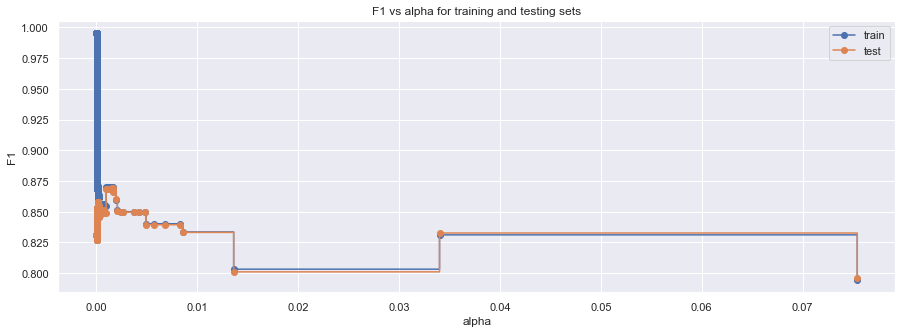

In [138]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1")
ax.set_title("F1 vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

- Choosing alpha = 0.07 would result in a tree with only one node (loss of information)
- We can choose alpha = 0.01, to get good balance of high F1 score as well retaining information in our set

**Creating model with 0.01 ccp_alpha**

In [139]:
best_model1 = DecisionTreeClassifier(
    ccp_alpha=0.01, class_weight={0: 0.65, 1: 0.35}, random_state=1
)
best_model1.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, class_weight={0: 0.65, 1: 0.35},
                       random_state=1)

#### Checking performance on the training set

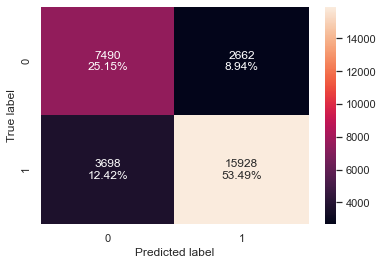

In [140]:
confusion_matrix_sklearn(best_model1, X_train, y_train)

In [141]:
decision_tree_postpruned_perf_train = get_perf_score(best_model1, X_train, y_train)
decision_tree_postpruned_perf_train

Accuracy    Recall  Precision        F1
0   0.78642  0.811576   0.856805  0.833578

#### Checking performance on the test set

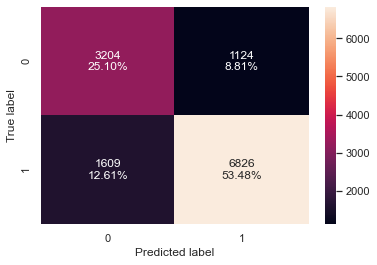

In [142]:
confusion_matrix_sklearn(best_model1, X_test, y_test)

In [143]:
decision_tree_postpruned_perf_test = get_perf_score(best_model1, X_test, y_test)
decision_tree_postpruned_perf_test

Accuracy    Recall  Precision        F1
0  0.785865  0.809247   0.858616  0.833201

- The model is giving a generalized performance on training & testing sets
- The F1 performance is comparable to that obtained from statsmodel but less optimized that one obtained from pre-pruned tree model

### Visualizing the Decision Tree

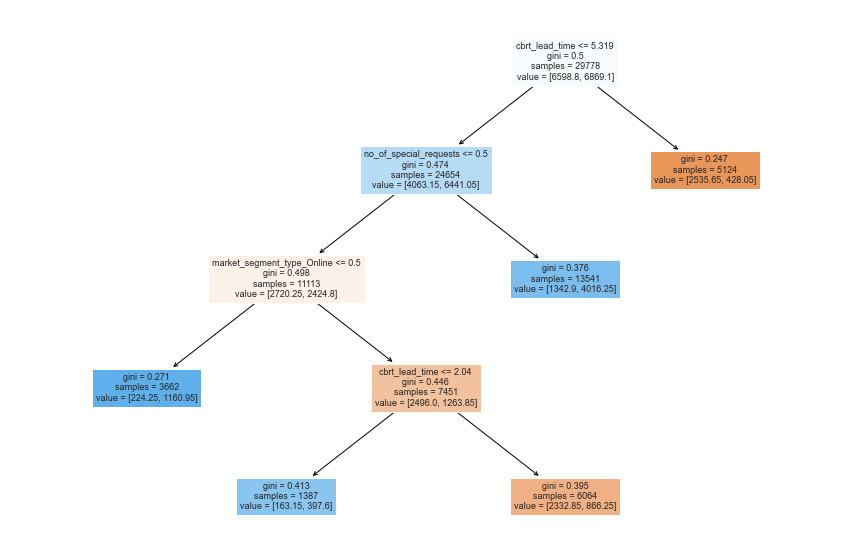

In [144]:
plt.figure(figsize=(15, 10))

out = tree.plot_tree(
    best_model1,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [145]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model1.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                                         Imp
cbrt_lead_time                                      0.566865
market_segment_type_Online                          0.241150
no_of_special_requests                              0.191985
no_of_adults                                        0.000000
room_type_reserved_Room_Type 6                      0.000000
binned_no_of_previous_cancellations_1_canceled_...  0.000000
repeated_guest_1                                    0.000000
market_segment_type_Offline                         0.000000
market_segment_type_Corporate                       0.000000
market_segment_type_Complementary                   0.000000
arrival_month_Winter                                0.000000
room_type_reserved_Room_Type 1                      0.000000
room_type_reserved_Room_Type 4                      0.000000
no_of_children                                      0.000000
required_car_parking_space_1                        0.000000
type_of_meal_plan_Not_Me

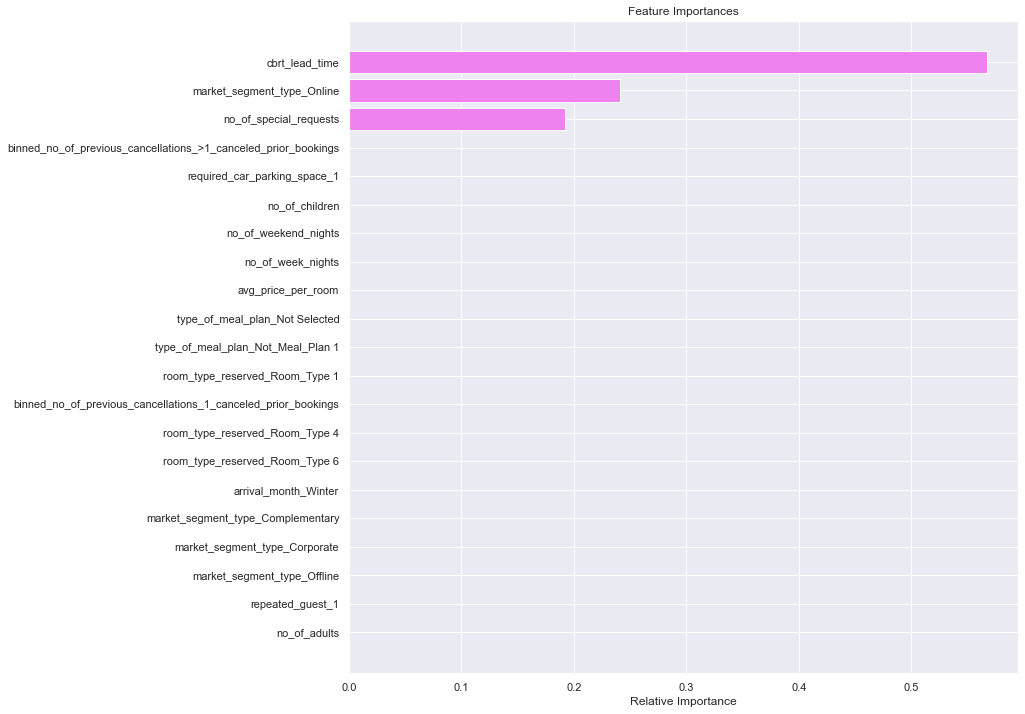

In [146]:
importances = best_model1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- cbrt_lead_time, market_segment_type_online & no_of_special_requests were found to be important parameters to predict cancelations
- As was corroborated by EDA and previous models built, as well as intutively understood
   - Bookings with higher lead times, have a higher odd of cancelations
   - Bookings with more number of special requests (3+) have very low odds of cancelations
- market_segment was previously excluded from the regression model fit as it was found to be linearly correlated with other attributes. During EDA segment was identified to have the maximum variance in avg_price_per_room, as well as higher 25percentile, median, 75percentile than any other market segments for both canceled as well as not canceled bookings. This was included in the decision tree model as trees are immune to presence of lineraly correlated attributes in the dataset.  

In [148]:
# training performance comparison

tree_train_comp_df = pd.concat(
    [
        decision_tree_tune_perf_train.T,
        decision_tree_tune_perf_test.T,
    ],
    axis=1,
)
tree_train_comp_df.columns = [
    "Grid Search Hyperparameter Pruning",
    "Cost Complexity Pruning",
]

print("Training performance comparison:")
print(tree_train_comp_df.T)

print("\n")

# testing performance comparison

tree_test_comp_df = pd.concat(
    [
        decision_tree_postpruned_perf_train.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
tree_test_comp_df.columns = [
    "Grid Search Hyperparameter Pruning",
    "Cost Complexity Pruning",
]

print("Test set performance comparison:")
print(tree_test_comp_df.T)

Training performance comparison:
                                    Accuracy    Recall  Precision        F1
Grid Search Hyperparameter Pruning  0.813251  0.864567   0.853908  0.859204
Cost Complexity Pruning             0.810860  0.859751   0.854886  0.857312


Test set performance comparison:
                                    Accuracy    Recall  Precision        F1
Grid Search Hyperparameter Pruning  0.786420  0.811576   0.856805  0.833578
Cost Complexity Pruning             0.785865  0.809247   0.858616  0.833201


- Unlike a normal decision tree which is prone to overfitting, both grid search hyperparameter i.e., pre pruning & cost complexity i.e., post pruning are giving generalized results on both training & testing datasets
- In comparison to all models sklearn, statsmodel (default, AUC-ROC optimization, recall-precision), cost complexity/ post pruned decision tree,  – **the grid search hyperparameter / pre tuned decision tree has the highest F1 score and is able to explain 86% of information contained in the dataset**


## Recommendations

- ML model is able to predict cancelations or no cancelations for bookings with a confidence of ~86%. Hotel policies for staffing,  publicity and dynamic room pricing need to take into consideration the odds for cancelations & have contingency plans in place
- Lead time was identified as the most important feature with a longer lead time increasing the odds for cancelations. Policies need to be introduced to restrict how far in advance bookings can be made before the check in date
- Similarly, hotel policies need to restrict the length of hotel stay as bookings made for longer stay periods were also found to have increased odds of cancelations 
- The repeat guests (although few) were identified to have lower odds of cancelations. Hotel policies need to incentivize current & previous guests to increase conversion as repeated guests
-  More bookings (as well as more cancelations) were found to occur over months (March - August) than months (September - February). Broadly policies and plans can be formulated estimating business on this biannual basis 
- Majority of customers preferred Room Type 1. As well, this room has a pattern of not having as many bookings cancelled. The room has to be adequately marketed, and priced in order to capitalize on its strengths
- Across all market segments, avg price per room has been higher in instances where bookings have been canceled than in instances where bookings have not been canceled. More competition information is required to ensure that our pricing is competitive to retain guests